In [ ]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os.path
import collections
import powerlaw as pw

In [ ]:
with open("WG.pickle", 'rb') as f:
    G = pickle.load(f)

In [ ]:
Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
df_outG = G.subgraph(Gcc[0])

In [ ]:
nodes = list(G.nodes())

## Degree distributions

In [ ]:
def plot_deg_dist(G, b):
    if b == True:
        degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  
        degreeCount = collections.Counter(degree_sequence)
        deg, cnt = zip(*degreeCount.items())

        fig, ax = plt.subplots(figsize=(15,5))
        
        plt.bar(deg, cnt, width=2.0, color='g')
        plt.title("In Degree Histogram")
        plt.ylabel("Count")
        plt.xlabel("Degree")
        ax.set_xticks([d + 0.4 for d in deg])
        ax.set_xticklabels(deg)
    
    else:
        degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  
        degreeCount = collections.Counter(degree_sequence)
        deg, cnt = zip(*degreeCount.items())

        fig, ax = plt.subplots(figsize=(15,5))
        plt.bar(deg, cnt, color='g')

        plt.title("Out Degree Histogram")
        plt.ylabel("Count")
        plt.xlabel("Degree")
        ax.set_xticks([d + 0.4 for d in deg])
        ax.set_xticklabels(deg)
        

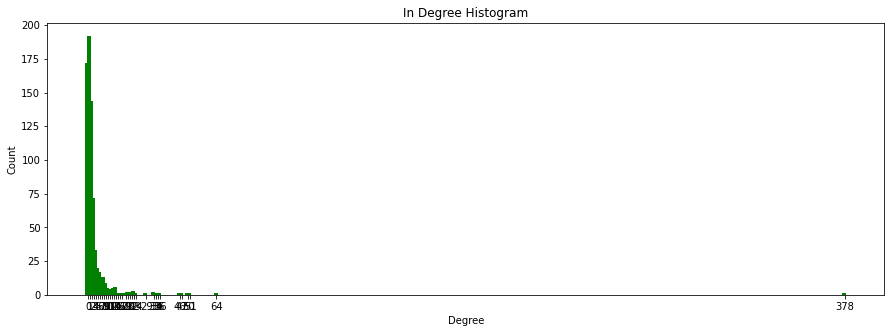

In [ ]:
plot_deg_dist(G, True)

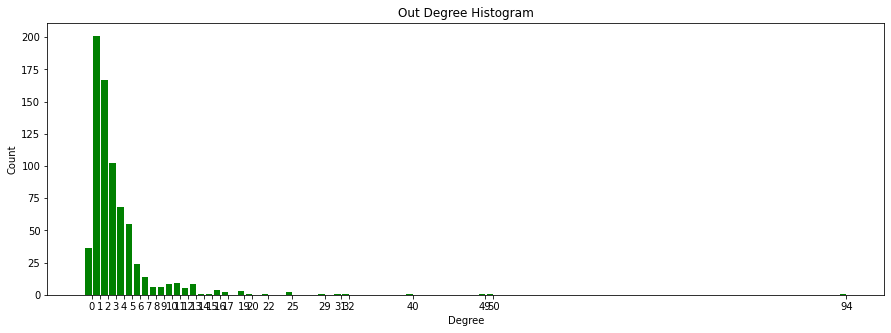

In [ ]:
plot_deg_dist(G,False)

In [ ]:
def plot_loglog_degree_histogram(G, b, normalized=True):
    if b:
        y = sorted([d for n, d in G.in_degree()], reverse=True)
    else:
        y = sorted([d for n, d in G.out_degree()], reverse=True)
    
    #y = nx.degree_histogram(G)
    
    x = np.arange(0,len(y)).tolist()
    
    n_nodes = G.number_of_nodes()
    
    if normalized:
        for i in range(len(y)):
            y[i] = y[i]/n_nodes
    plt.figure(figsize=(15,5))
    if b:
        plt.title('\nDistribution Of Node Linkages w.r.t. In-degree (log-log scale)')
    else:
        plt.title('\nDistribution Of Node Linkages w.r.t. Out-degree (log-log scale)')
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Number of Nodes\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(x, y, 'o')

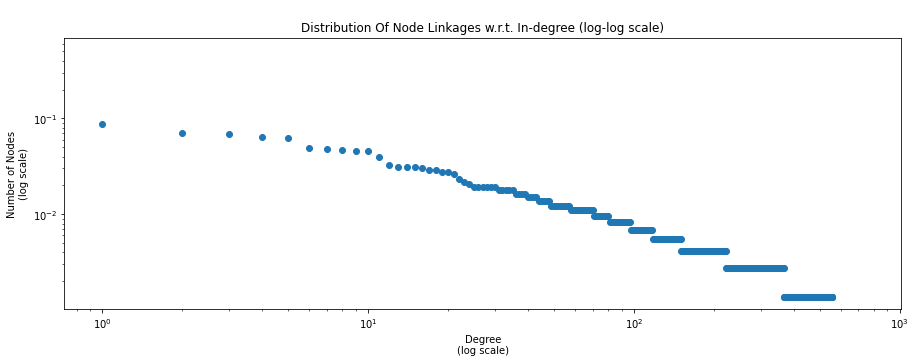

In [ ]:
plot_loglog_degree_histogram(G,True)

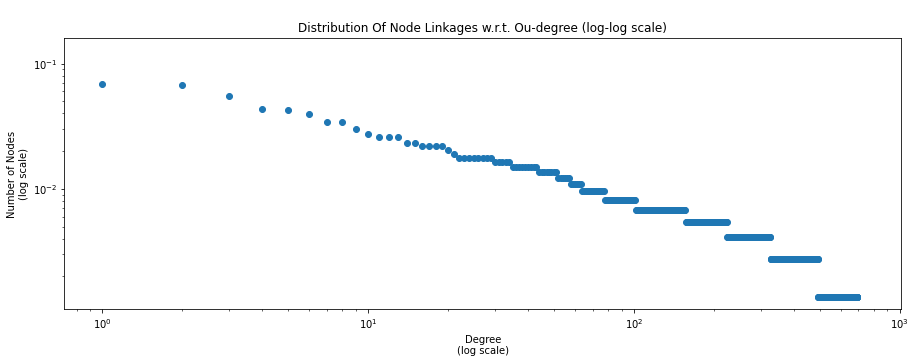

In [ ]:
plot_loglog_degree_histogram(G,False)

In [ ]:
deg = G.in_degree()
deg_vals = dict(deg).items()
max(deg_vals, key = lambda x: x[1])

('Geralt of Rivia', 378)

In [ ]:
deg = G.out_degree()
deg_vals = dict(deg).items()
max(deg_vals, key = lambda x: x[1])

('Gwent players', 94)

In [ ]:
def top_n_degree(G, n):
    degIn = G.in_degree()
    degIn_vals = dict(degIn)
    ins = str(sorted(degIn_vals, key=degIn_vals.get, reverse=True)[:n])

    degOut = G.out_degree()
    degOut_vals = dict(degOut)
    outs = str(sorted(degOut_vals, key=degOut_vals.get, reverse=True)[:n])
    
    print("Top " + str(n) + " characters based on In-degree: " + ins + "\n")
    print("Top " + str(n) + " characters based on Out-degree: " + outs)


In [ ]:
top_n_degree(G,5)

Top 5 characters based on In-degree: ['Geralt of Rivia', 'Ciri', 'Dandelion', 'Yennefer of Vengerberg', 'Triss Merigold']

Top 5 characters based on Out-degree: ['Gwent players', 'Geralt of Rivia', 'The Witcher journal character entries', 'The Witcher 3 merchants', 'Ciri']


In [ ]:
def powerlaw_values(G):
    in_deg = sorted([d for n, d in G.in_degree()], reverse=True)
    out_deg = sorted([d for n, d in G.out_degree()], reverse=True)
    in_fit = pw.Fit(in_deg, xmin=0)
    out_fit = pw.Fit(out_deg, xmin=0)
    print("Exponent for the in-degree distribution: " + str(in_fit.power_law.alpha) + "\n" + "Exponent for the out-degree distribution: " + str(out_fit.power_law.alpha))


In [ ]:
powerlaw_values(G)

Exponent for the in-degree distribution: 2.499786209123238
Exponent for the out-degree distribution: 3.2632104755254225
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/root/venv/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [ ]:
def get_plt_data(fig):

    ax = plt.gca() 
    line = ax.lines[0] 

    return line.get_xydata()



def plot_powerlaw(G, degree_type):
    if degree_type == "In-Degree":
        degree = sorted([d for n, d in G.in_degree()], reverse=True)
    else:
        degree = sorted([d for n, d in G.out_degree()], reverse=True)

    fit = pw.Fit(np.array(degree)+1, xmin=1, discrete=True)

    fig = plt.figure()
    fit.power_law.plot_pdf( color= 'b',linestyle='--', label='fit pdf')
    pdf_fit = get_plt_data(fig)    

    fig = plt.figure()
    fit.plot_pdf(color= 'b', label='data')
    pdf_data = get_plt_data(fig)  
    return pdf_fit, pdf_data


/root/venv/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


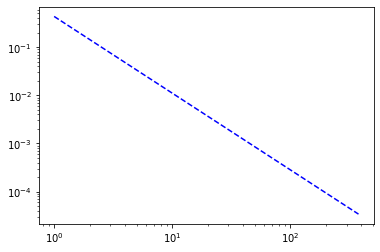

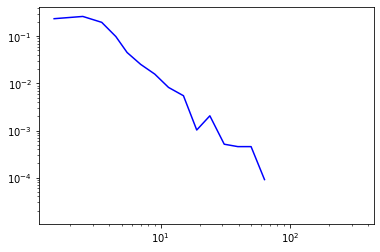

In [ ]:
pdf_fit, pdf_data = plot_powerlaw(G, "In-Degree")

In [ ]:
df_fit = pd.DataFrame(pdf_fit)
df_fit["Data"] = "PDF Powerlaw"
df_data = pd.DataFrame(pdf_data)
df_data["Data"] = "PDF Data"
df = pd.concat([df_fit, df_data], axis=0)
df.columns = ["Bin", "PDF", "Data"]
df

,Bin,PDF,Data
0,1.0,0.432495,PDF Powerlaw
1,2.0,0.143620,PDF Powerlaw
2,3.0,0.075363,PDF Powerlaw
3,4.0,0.047693,PDF Powerlaw
4,5.0,0.033444,PDF Powerlaw
5,6.0,0.025026,PDF Powerlaw
6,7.0,0.019585,PDF Powerlaw
7,8.0,0.015838,PDF Powerlaw
8,9.0,0.013132,PDF Powerlaw
9,10.0,0.011106,PDF Powerlaw


In [ ]:
line.get_xydata()[:,0]

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  20.,  21.,  22.,  23.,
        24.,  25.,  30.,  34.,  35.,  36.,  37.,  47.,  48.,  51.,  52.,
        65., 379.])

## Comparison to a ER graph by degree distributions

In [ ]:
uG = G.to_undirected()
uG.number_of_nodes()

731

In [ ]:
def plot_degreedist_comparison(G): #G is a directed graph
    uG = G.to_undirected() #Get the undirected graph

    avg_deg = sum(dict(uG.degree()).values()) / uG.number_of_nodes() #Average degree of undir graph
    nGNodes = uG.number_of_nodes()
    p = avg_deg/(nGNodes - 1) # Connection prob
    erG = nx.generators.random_graphs.erdos_renyi_graph(nGNodes, p) #Erdos Reyni graph corresponding to the Witcher graph 

    # Degrees for Witcher
    degree_sequence = sorted([d for n, d in uG.degree()], reverse=True)  
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    # Degrees for random
    rand_degree_sequence = sorted([d for n, d in erG.degree()], reverse=True)  
    rand_degree_count = collections.Counter(rand_degree_sequence)
    r_deg, r_cnt = zip(*rand_degree_count.items())

    #Plot object
    fig, axs = plt.subplots(2, figsize=(15,10))

    #Title and layout
    fig.suptitle("Degree histogram for Witcher (top) and Erdos-Reyni/random (bottom)")
    fig.tight_layout(pad=3.0)

    #Witcher degree dist
    axs[0].bar(deg, cnt, width=2.0, color='g')
    axs[0].set_xticks([d + 0.4 for d in deg])
    axs[0].set_xticklabels(deg)

    #Random degree dist
    axs[1].bar(r_deg, r_cnt, width=2.0, color='g')
    axs[1].set_xticks([d + 0.4 for d in r_deg])
    axs[1].set_xticklabels(r_deg)

    # Set common labels
    fig.text(0.5, 0.04, 'Degree', ha='center', va='center')
    fig.text(0.001, 0.5, 'Count', ha='center', va='center', rotation='vertical')

    plt.show()
    print("Witcher edges: " + str(uG.number_of_edges()) + "\n" + "Erdos-Réyni edges: " + str(erG.number_of_edges()))

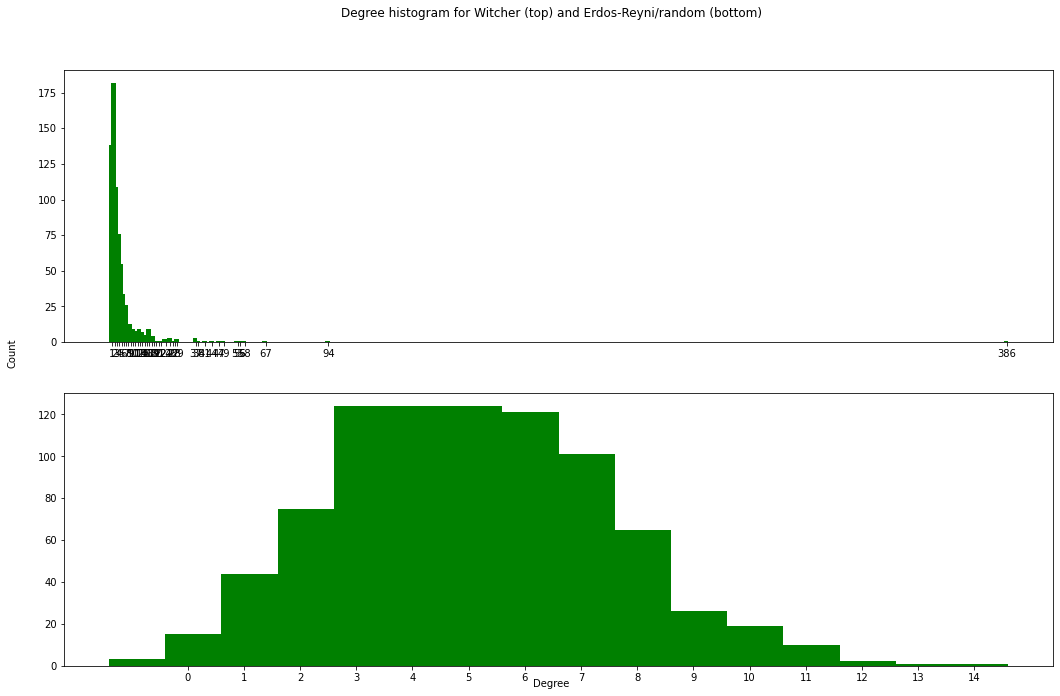

Witcher edges: 2086
Erdos-Réyni edges: 1991


In [ ]:
plot_degreedist_comparison(G)

In [ ]:
def plot_loglog_degree_histogram_comparison(G, normalized=True):
    uG = G.to_undirected() #Get the undirected graph

    avg_deg = sum(dict(uG.degree()).values()) / uG.number_of_nodes() #Average degree of undir graph
    nGNodes = uG.number_of_nodes()
    p = avg_deg/(nGNodes - 1) # Connection prob
    erG = nx.generators.random_graphs.erdos_renyi_graph(nGNodes, p) #Erdos Reyni graph corresponding to the Witcher graph 
    
    yG = nx.degree_histogram(G)
    
    xG = np.arange(0,len(yG)).tolist()
    
    n_nodes = G.number_of_nodes()
    
    if normalized:
        for i in range(len(yG)):
            yG[i] = yG[i]/n_nodes
    plt.figure(figsize=(15,5))
    plt.title('\nDistribution Of Witcher Node Linkages (log-log scale) ')
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Number of Nodes\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(xG, yG, 'o')

    yerG = nx.degree_histogram(erG)
    
    xerG = np.arange(0,len(yerG)).tolist()
    
    n_nodes = erG.number_of_nodes()
    
    if normalized:
        for i in range(len(yerG)):
            yerG[i] = yerG[i]/n_nodes
    plt.figure(figsize=(15,5))
    plt.title('\nDistribution Of Erdos-Reyni Node Linkages (log-log scale) ')
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Number of Nodes\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(xerG, yerG, 'o')

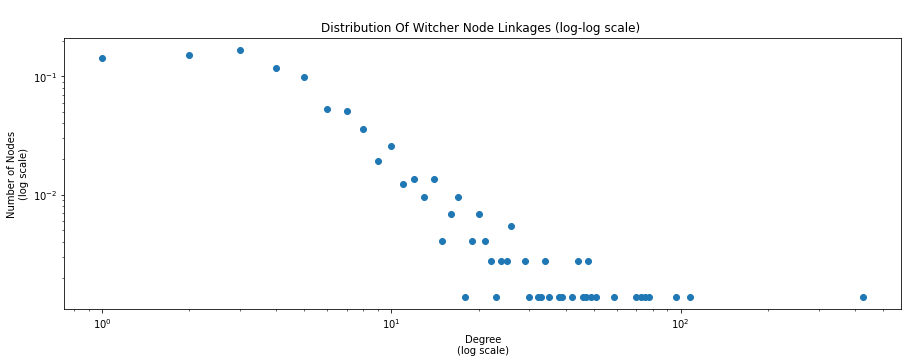

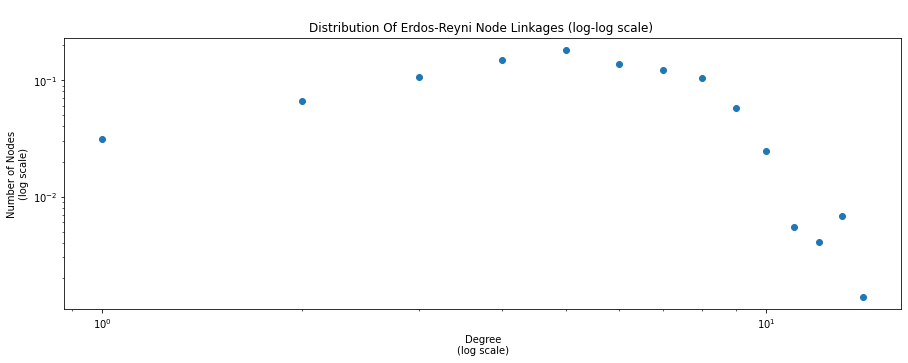

In [ ]:
plot_loglog_degree_histogram_comparison(G)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>